In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
df_tr = pd.read_csv('train.csv')
df_te = pd.read_csv('test.csv')

In [8]:
#Analyzing Data

df_tr.head()
df_tr.describe()
df_tr.info()
df_tr[df_tr['Embarked'].isnull()]
df_tr['Embarked'].unique()
df_tr['Embarked'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
#Cleaning and completing Data

df_tr = df_tr.fillna({'Age': np.mean(df_tr['Age'])}) # Filling null age values with mean
df_tr = df_tr.fillna({'Cabin': 0})# Filling the null cabin values with 0 
df_tr = df_tr.fillna({'Embarked': 'S'}) #Filling the data with S since it has higest mode
df_tr.drop(['PassengerId','Ticket','Name'],axis = 1,inplace = True) # Dropped the unneccesary columns 
df_tr.info() # No null values now

df_te = df_te.fillna({'Age': np.mean(df_te['Age'])}) # Filling null age values with mean
df_te = df_te.fillna({'Cabin': 0})# Filling the null cabin values with 0 
df_te = df_te.fillna({'Embarked': 'S'}) #Filling the data with S since it has higest mode
df_te = df_te.fillna({'Fare': np.mean(df_te['Fare'])})
df_te.drop(['PassengerId','Ticket','Name'],axis = 1,inplace = True) # Dropped the unneccesary columns 
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Cabin       418 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [10]:
# Replacing the categorical values with integer values

cat = {'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}}
df_tr.replace(cat,inplace = True)
df_tr['Cabin'] = df_tr['Cabin']==0
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_tr['Cabin'] = LE.fit_transform(df_tr['Cabin'])
df_tr = df_tr.drop('Cabin',axis =1)
df_tr.head(10)

cat = {'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}}
df_te.replace(cat,inplace = True)
df_te['Cabin'] = df_te['Cabin']==0
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_te['Cabin'] = LE.fit_transform(df_te['Cabin'])
df_te = df_te.drop('Cabin',axis =1)
df_te.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0
5,3,1,14.0,0,0,9.2250,0
6,3,0,30.0,0,0,7.6292,2
7,2,1,26.0,1,1,29.0000,0
8,3,0,18.0,0,0,7.2292,1
9,3,1,21.0,2,0,24.1500,0


In [11]:
train_data = df_tr
test_data = df_te

In [16]:
train_data.to_csv('file1.csv',index = False)
test_data.to_csv('file2.csv',index = False)

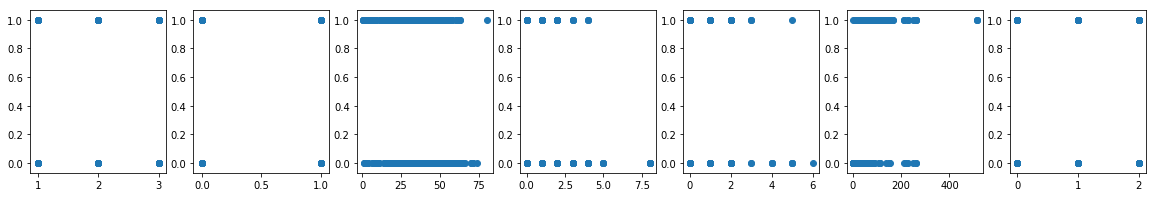

In [47]:
# Visualising training data

df = pd.read_csv('file1.csv')
fig , ax = plt.subplots(1,7,figsize = (20,3))
list = df.columns.values[1:].tolist()
for column_name, ax in zip(list,ax):
    ax.scatter(df[column_name],df['Survived'])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

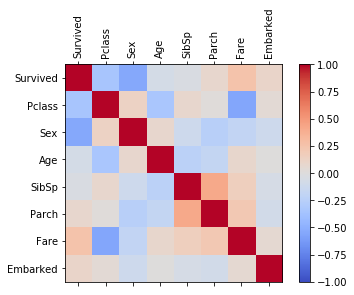

In [60]:
# Finding Corelation between variables

corr = df.corr()
fig =plt.figure()
ax = fig.add_subplot(111)
cx = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cx)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.xticks(rotation=90)

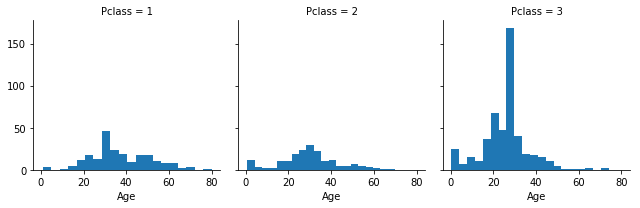

In [69]:
# Plotting hist for continous analysis

g = sns.FacetGrid(df, col='Pclass')
g.map(plt.hist, 'Age', bins=20)

In [78]:
# Creating Age Bands

df['AgeBand'] = pd.cut(df['Age'], 5)
df.head()
df1 = pd.read_csv('file2.csv')
combine = [df,df1]
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
df1.head()
df = df.drop(['AgeBand'], axis=1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2.0,0,0,7.8292,2
1,3,0,2.0,1,0,7.0000,0
2,2,1,3.0,0,0,9.6875,2
3,3,1,1.0,0,0,8.6625,0
4,3,0,1.0,1,1,12.2875,0


In [85]:
# Combining both variables siblings and parents

combine = [df,df1]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
df = df.drop(['Parch', 'SibSp'], axis=1)
df1 = df1.drop(['Parch', 'SibSp'], axis=1)

In [102]:
# Creating Fare Bands

df['FareBand'] = pd.qcut(df['Fare'], 4)
combine = [df,df1]
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

df = df.drop(['FareBand'], axis=1)

In [117]:
#Creating test models
X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]
X_test  = df1
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [131]:
acc_log = []
models = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors = 3)
         ,GaussianNB(),Perceptron(),LinearSVC()
         ,SGDClassifier(),DecisionTreeClassifier()
         ,RandomForestClassifier(n_estimators=100)]
for model in models:
    md = model
    md.fit(X_train, Y_train)
    Y_pred = md.predict(X_test)
    acc_log.append(round(md.score(X_train, Y_train) * 100, 2))


G:\Python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [135]:
md = RandomForestClassifier(n_estimators=100)
md.fit(X_train, Y_train)
Y_pred = md.predict(X_test)
Y_new = zip(np.arange(1,418,1),Y_pred)

(418,)

In [170]:
X = np.arange(1,419,1)
dict = {}
dict = {'PassengerId':X,'Survived':Y_pred}
Y_new = pd.DataFrame(dict,index=)


TypeError: object of type 'bool' has no len()

In [165]:
Y_new.to_csv('Piyush_titanic_submission.csv')

In [169]:
Y_new.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
